# Exploratory Analysis using Pokemon DB :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#Let's rename the # column to id, and convert all column labels to lower case.
# use df.rename to rename the # column to id
# use df.columns.str.lower() to convert all column labels to lower case
# you should see:
df.rename(index=str, columns={'#':'id'}, inplace=True)
df.columns=df.columns.str.lower()
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#Now let's take a look at any duplicated rows via the id column.
df[df.duplicated('id', keep=False)]

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


In [5]:
# Lets exclude these duplicates in our analysis except for the first instance
df.drop_duplicates('id', keep='first', inplace=True)
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [6]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [7]:
# Filling the Nan values
df['type 2'].fillna('None', inplace=True)

In [8]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
# create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']
pokedex=df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]

In [9]:
# creating poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics=df[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']]

In [10]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [11]:
# creating a groupby to see below :
pokedex.groupby(['generation']).describe().stack()

id
generation                  
1          count  151.000000
           mean    76.000000
           std     43.734045
           min      1.000000
           25%     38.500000
           50%     76.000000
           75%    113.500000
           max    151.000000
2          count  100.000000
           mean   201.500000
           std     29.011492
           min    152.000000
           25%    176.750000
           50%    201.500000
           75%    226.250000
           max    251.000000
3          count  135.000000
           mean   319.000000
           std     39.115214
           min    252.000000
           25%    285.500000
           50%    319.000000
           75%    352.500000
           max    386.000000
4          count  107.000000
           mean   440.000000
           std     31.032241
           min    387.000000
           25%    413.500000
           50%    440.000000
           75%    466.500000
           max    493.000000
5          count  156.000000
           mean   571.500000
           std     45.177428
           min    494.000000
           25%    532.750000
           50%    571.500000
           75%    610.250000
           max    649.000000
6          count   72.000000
           mean   685.500000
           std     20.928450
           min    650.000000
           25%    667.750000
           50%    685.500000
           75%    703.250000
           max    721.000000

Text(0.5, 0, 'Generation')

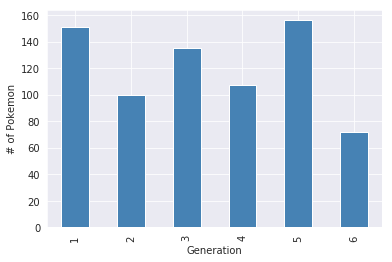

In [12]:
sb.set_style('darkgrid')
pokedex.groupby('generation').count()['id'].plot(kind='bar', color='steelblue')
plt.ylabel('# of Pokemon')
plt.xlabel('Generation')

### Try Seaborn:

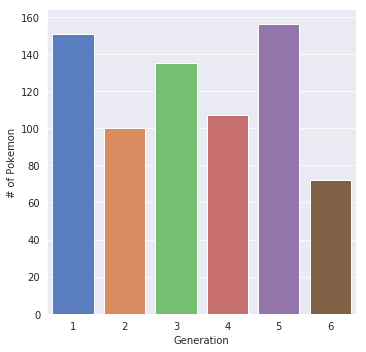

In [13]:
sb.catplot(kind='count', data=pokedex, x='generation', palette='muted').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

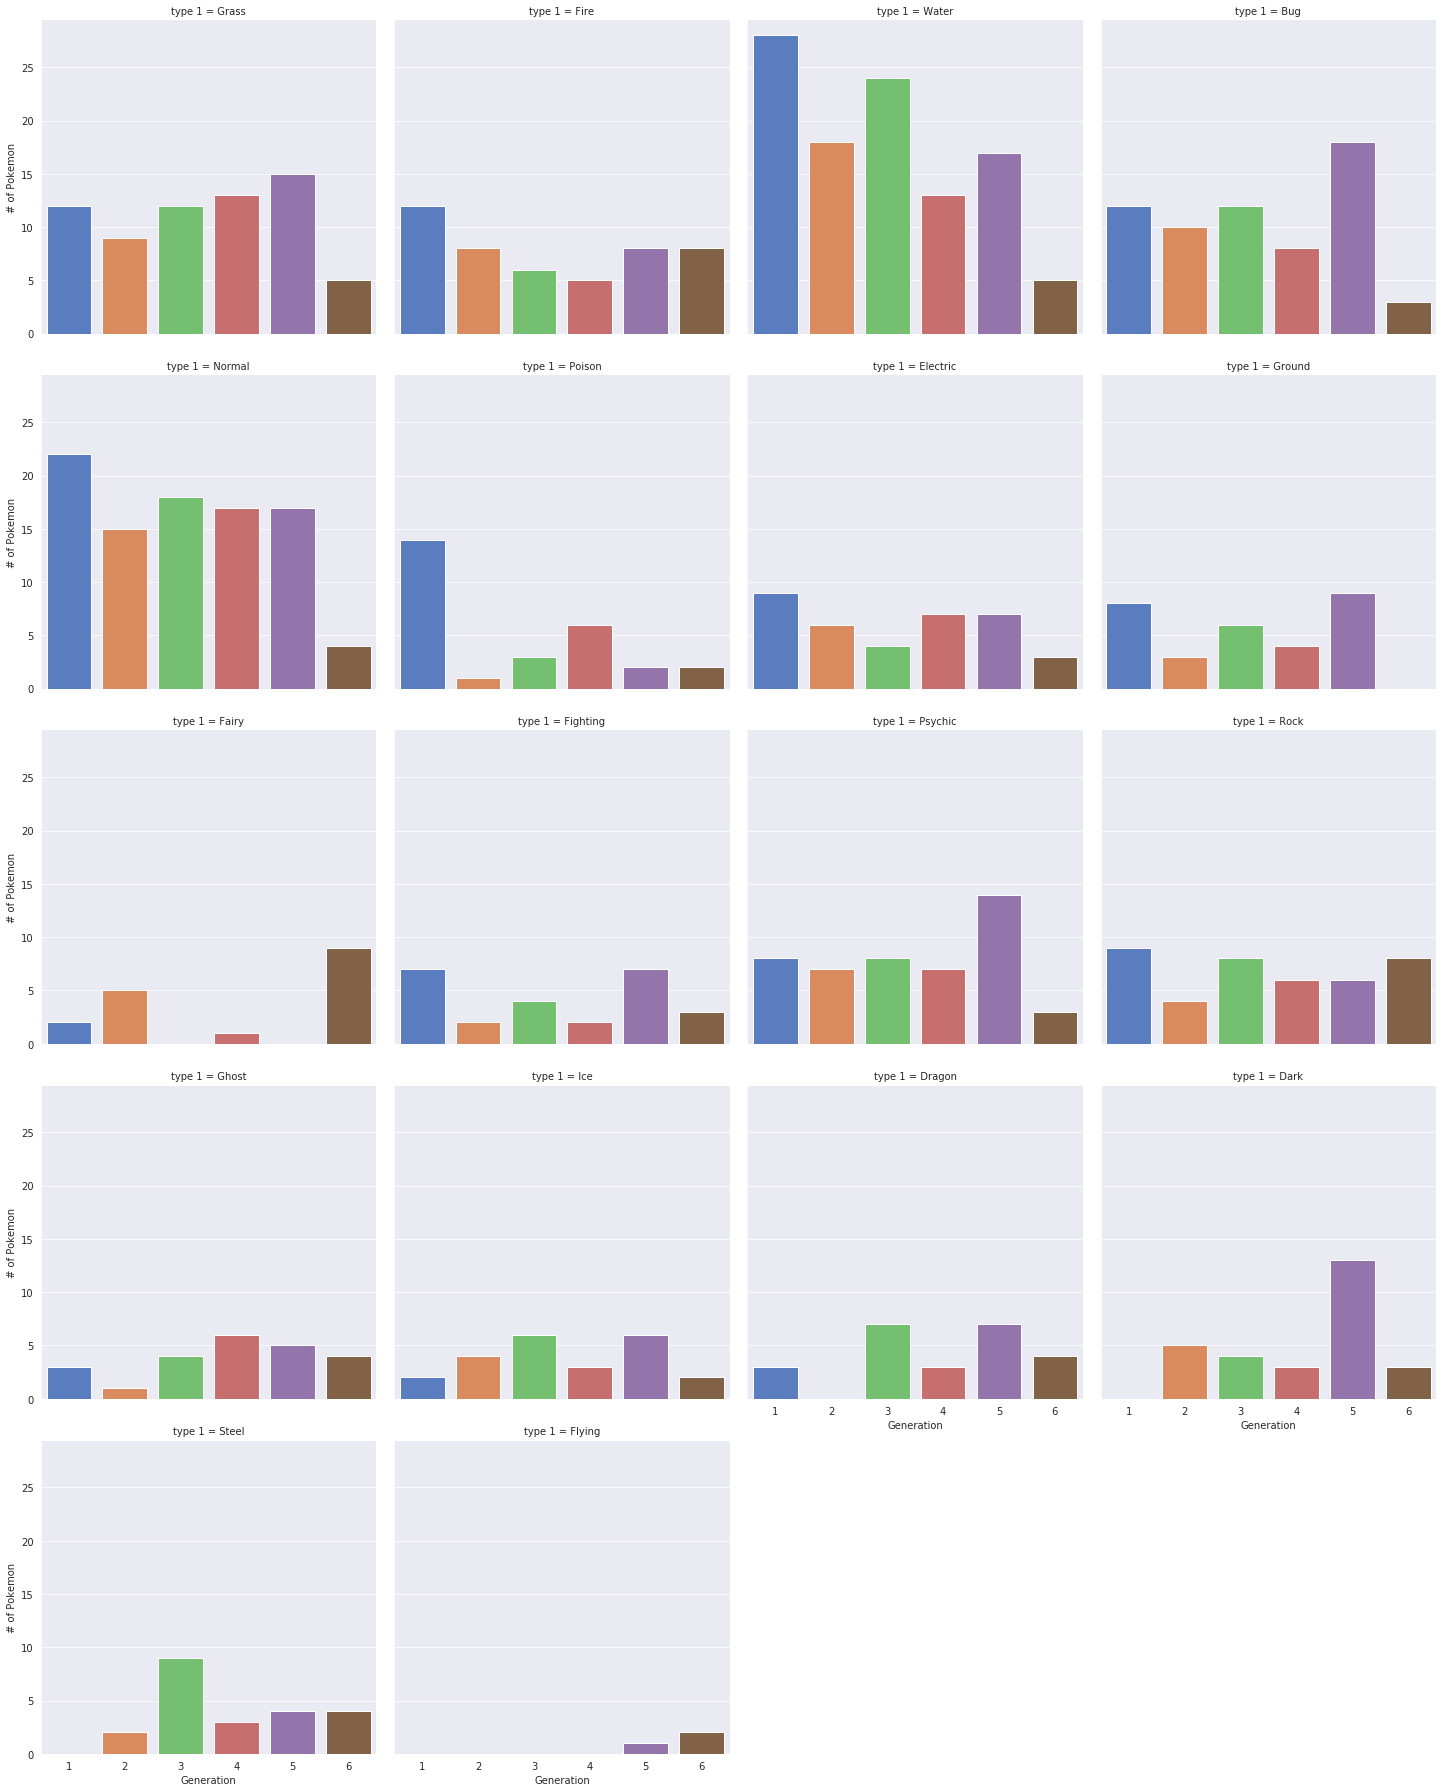

In [15]:
sb.catplot(kind='count', 
              data=pokedex, palette='muted',
              col='type 1', col_wrap=4, x='generation').set_axis_labels("Generation", "# of Pokemon")

### Observations :

- Basic pokemon types - normal, fire, water, grass and bug - are very large in count and are being introduced in large numbers through genrations 1-5 (number of pokemon introduced per type is somewhat consistent with total number of pokemon introduced - i.e, more pokemon are introduced in odd numbered generations in most cases.)

- The count of Generation 1 pokemon are the highest across many of the pokemon types - these types are most likely the only ones introduced in the first generation. We can see the introduction of more flying, fairy, dark, dragon, ghost types (which are most likely newer types) in generations 3-6.

- Generation 5 and Generation 1 see an introduction of a large number of pokemon.

- Pokemon having type 1 as Flying, Fairy, Steel and Dragon are low in number and are probably rarer in occurence in the pokemon world.


### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [47]:
import numpy as np
np.setdiff1d?
#Return the sorted, unique values in `ar1` that are not in `ar2`.

In [17]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [18]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['None'], dtype=object)

In [19]:
### There are no unique primary or secondary types

In [20]:
# Getting the total number of primary and secondary types:
print("# of Type1 Pokemon:",pokedex['type 1'].nunique())
print("# of Type2 Pokemon:",pokedex['type 2'].nunique())

# of Type1 Pokemon: 18
# of Type2 Pokemon: 19


### What are the most common types of Pokemon?

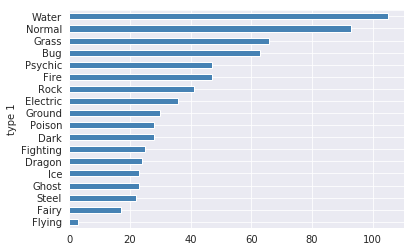

In [21]:
# Making a plot of the distribution of the Type 1 Pokemon. 
pokedex.groupby('type 1').count()['id'].sort_values().plot(kind='barh', color='steelblue')

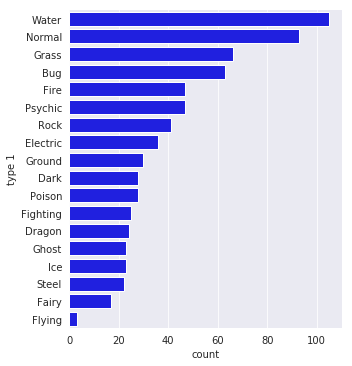

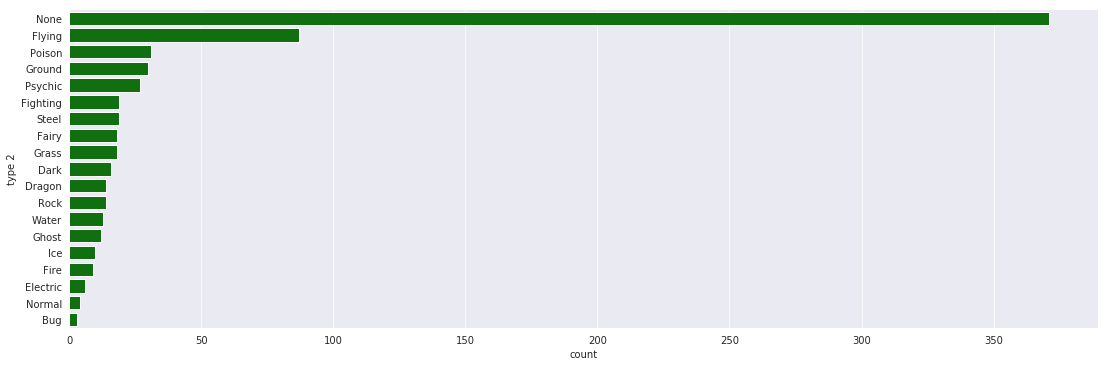

In [22]:
# Now trying Seaborn:
sb.catplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.catplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

# Observations:

- A large number of pokemon (around 50%) are only type 1 pokemon - or have only one type.
- Water pokemon are the largest in number followed by normal, and grass. As noted earlier Dragon, Fairy, Steel occur rarely.
- An intersting thing to note is that there are a large number of pokemon who have type 2 as flying. This is probably because these pokemon have wings or other abilities that help them fly. (Eg: Bugs, Dragons, Birds and Fairies can fly.)


### But we can not say which type maps into which type !

Lets create a heatmap !

In [23]:
# Creating a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types=pokedex[pokedex['type 2']!='None']
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


In [24]:
# Geting a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values and any other attributes we may need)
dual_df=dual_types.groupby(['type 1', 'type 2']).size().unstack(fill_value=0)
dual_df

type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,1,2,13,1,6,1,0,0,11,0,3,5,1
Dark,0,0,3,0,0,2,2,5,1,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,0,0,1,4,0,0,4,1,0,0,2,0,0,0
Electric,0,0,0,0,1,0,0,3,1,0,0,0,2,0,0,0,3,0
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0
Fire,0,0,0,0,0,6,0,5,0,0,2,0,2,0,1,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,1,0,0,0,3,2,0,4,0,0,0,3,0,0,0,0


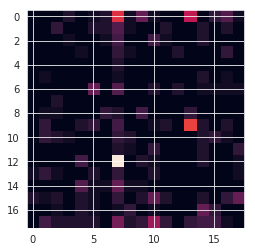

In [25]:
# Trying matplotlib imshow as a way to get a heatmap:
plt.imshow(dual_df)

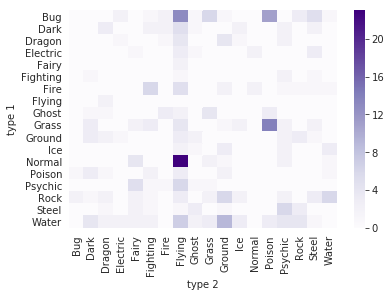

In [26]:
# Using seaborn heatmap option:
sb.heatmap(dual_df, cmap='Purples')

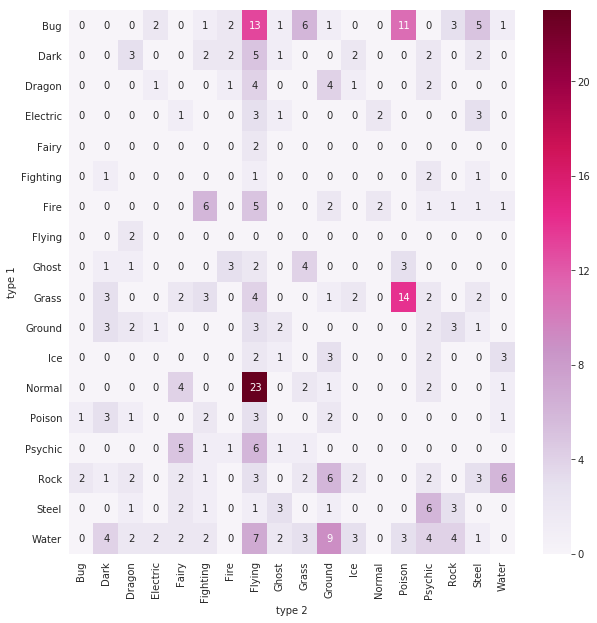

In [27]:
# Refining seaborn expression to get a better heatmap :
sb.set_style('darkgrid')
plt.subplots(figsize=(10,10))
sb.heatmap(dual_df, annot=True, cmap='PuRd')

### Conclusions:
- Among the pokemon that have two types, the highest occuring type is normal - flying combination. This means that most of these pokemon are probably birds or have bird-like features aloowing them to fly.
- Grass-poison combination has second highest occurence. It makes sense as most venomous creatures are found in grass - similar to reality as in the case of snakes, scoprpions, etc.
- Bug-Flying and Bug-Poison have the next highest occurence - again, it makes sense as some bugs are venomous and most bugs have wings.
- Most of the pokeomon have lesser occurances, with some unlikely combinations such as Fire-Water occuring only once.

### Are any of the statistics correlated?

Text(0, 0.5, 'defense')

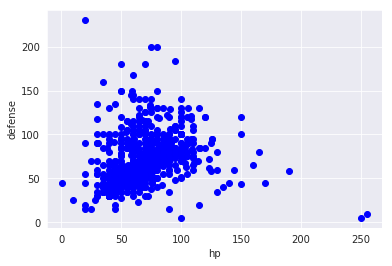

In [28]:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if we can see any correlation. 
sb.set_style('darkgrid')
plt.scatter(poke_statistics.hp, poke_statistics.defense, color='b')
plt.xlabel('hp')
plt.ylabel('defense')

In [29]:
poke_statistics.corr()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
id,1.000000,0.107512,0.144459,0.115090,0.126503,0.104998,0.028156,0.160370
hp,0.107512,1.000000,0.425839,0.234177,0.362636,0.382569,0.170031,0.642628
attack,0.144459,0.425839,1.000000,0.434022,0.339699,0.208322,0.332172,0.704247
defense,0.115090,0.234177,0.434022,1.000000,0.202188,0.479991,-0.006849,0.605786
sp. atk,0.126503,0.362636,0.339699,0.202188,1.000000,0.493038,0.439548,0.723143
sp. def,0.104998,0.382569,0.208322,0.479991,0.493038,1.000000,0.236499,0.707223
speed,0.028156,0.170031,0.332172,-0.006849,0.439548,0.236499,1.000000,0.548890
total,0.160370,0.642628,0.704247,0.605786,0.723143,0.707223,0.548890,1.000000


In [30]:
# It seems hard to see the correlation based on the scatter plots.
# We will use "pearsonr" function from scipy's "stats" library to compute the correlation between 
from scipy import stats
#stats.pearsonr?

In [31]:
# Looping over all combinations and output the correlation coefficients. Then sorting based on the coefficients
import itertools
stats_pairlist=list(itertools.combinations(['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed', 'total'],2))

In [32]:
newlist=[]
for i in stats_pairlist:
    newlist.append([i, stats.pearsonr(poke_statistics[i[0]],poke_statistics[i[1]])])
    
pearsonlist=pd.DataFrame()
pearsonlist=pearsonlist.append(newlist)
pearsonlist.sort_values(by=[1], ascending=False, inplace=True)
pearsonlist.reset_index(drop=True, inplace=True)
pearsonlist.columns=['Combination', 'Peason Coefficients (p, r)']
pearsonlist

,Combination,"Peason Coefficients (p, r)"
0,"(sp. atk, total)","(0.7231429403743894, 1.1535882395463234e-117)"
1,"(sp. def, total)","(0.7072234536413495, 2.246205145131801e-110)"
2,"(attack, total)","(0.7042469640111944, 4.571779886128058e-109)"
3,"(hp, total)","(0.6426280244799402, 3.146172502840608e-85)"
4,"(defense, total)","(0.6057863342638177, 1.9969095175369534e-73)"
5,"(speed, total)","(0.5488902010278793, 5.7470277125610205e-58)"
6,"(sp. atk, sp. def)","(0.4930378568268582, 1.9762926999484044e-45)"
7,"(defense, sp. def)","(0.4799909288960093, 8.021535723777218e-43)"
8,"(sp. atk, speed)","(0.4395480740976364, 2.0407501904136755e-35)"
9,"(attack, defense)","(0.4340218261332669, 1.7645656275400398e-34)"


/home/abhi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


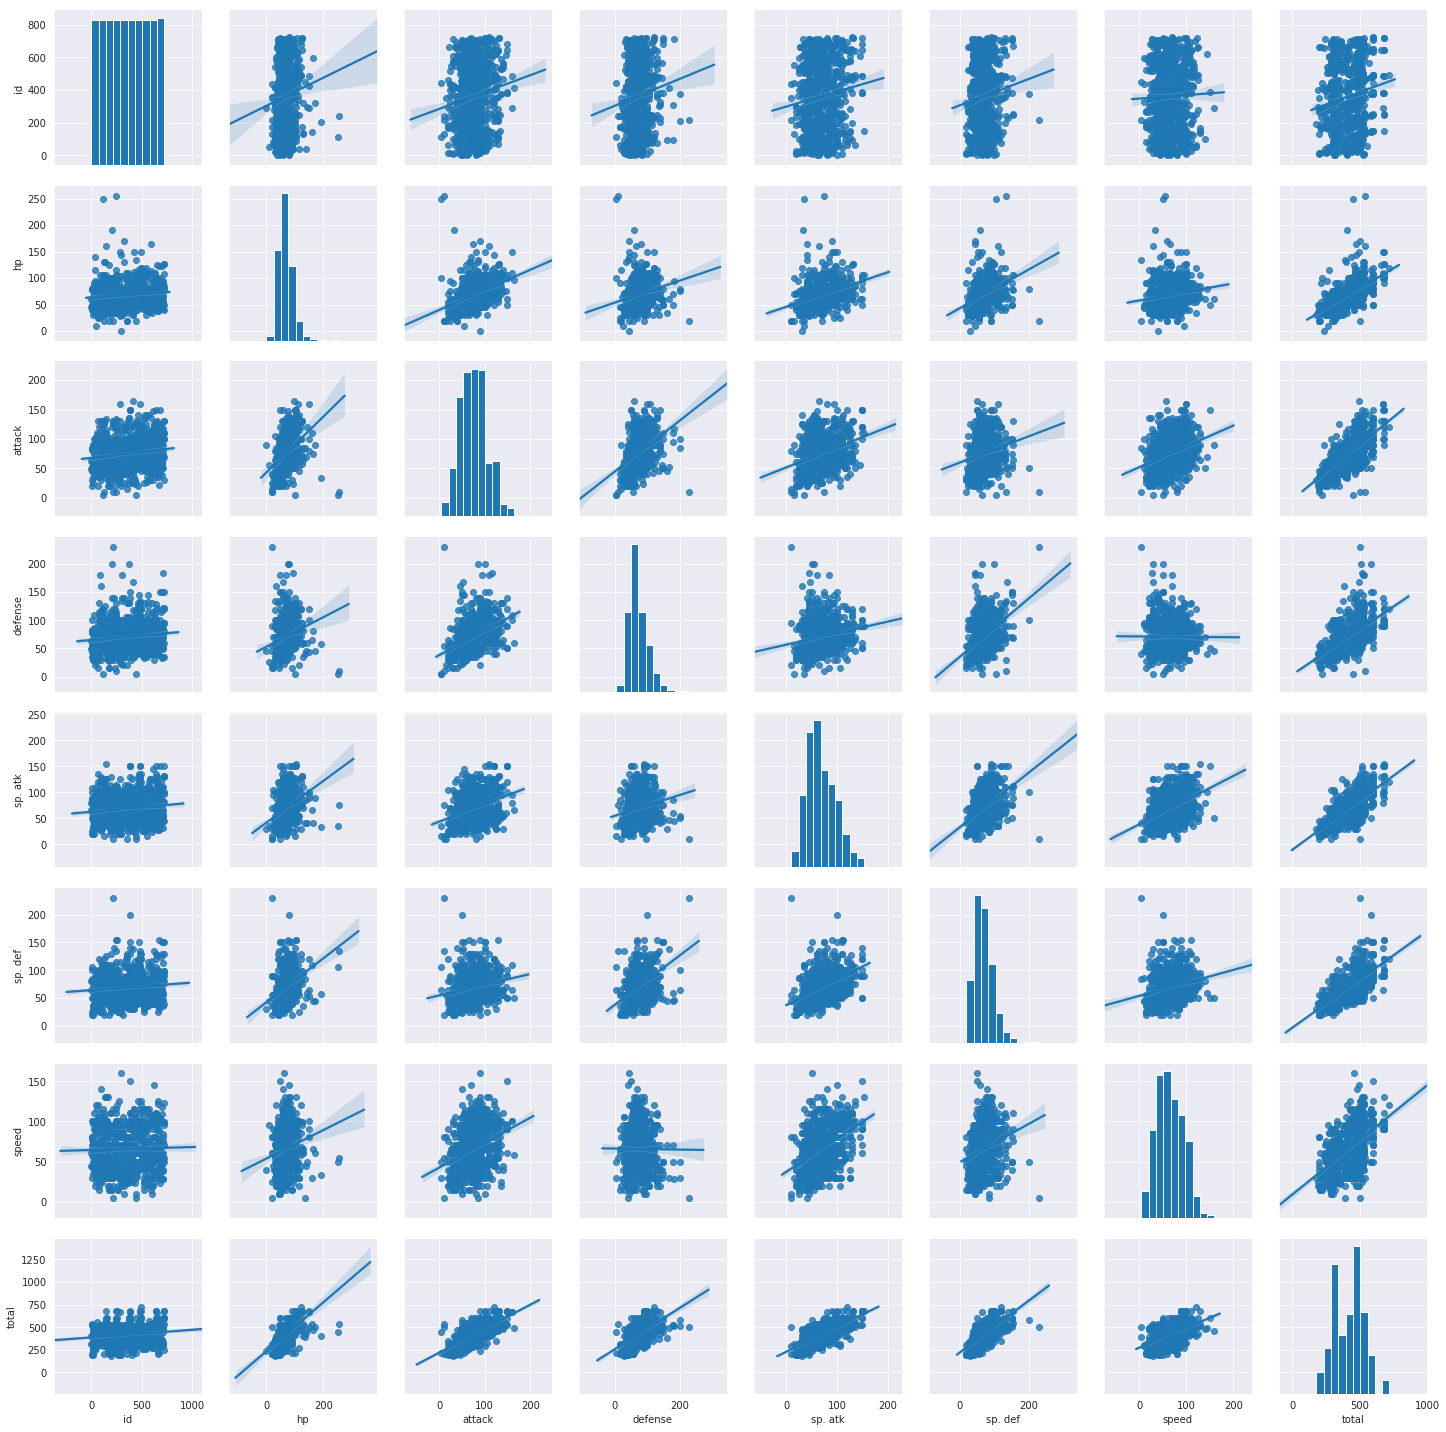

In [33]:
# Nothing is better than a good visualization. 
# Trying seaborn's pairplot:

sb.set_style('darkgrid')
sb.pairplot(poke_statistics, kind='reg', markers='o', palette='PuBu')

In [34]:
pairplt=poke_statistics[['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']]

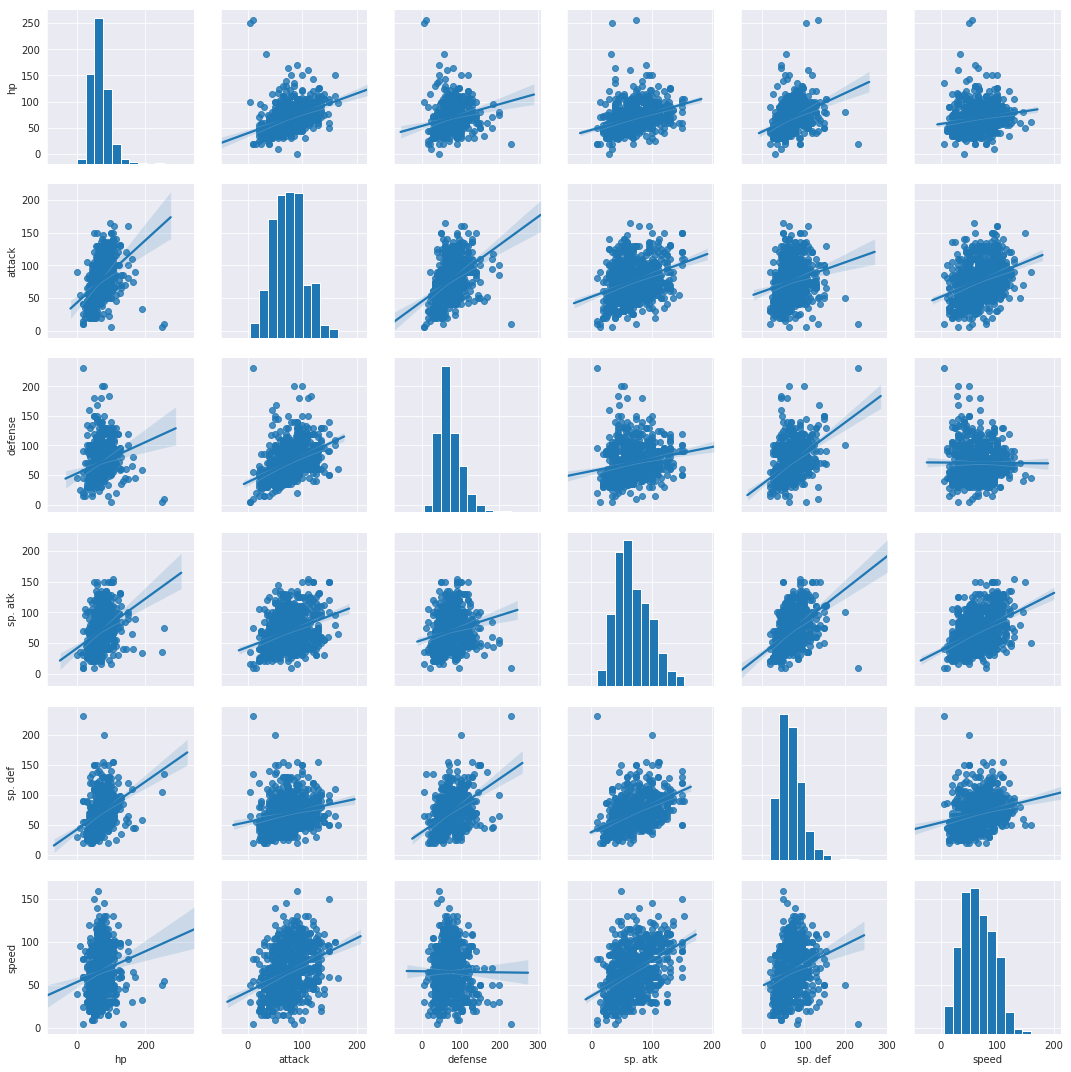

In [35]:
# Getting rid of extra columns :
sb.set_style('darkgrid')
sb.pairplot(pairplt, kind='reg', markers='o', palette='PuBu')

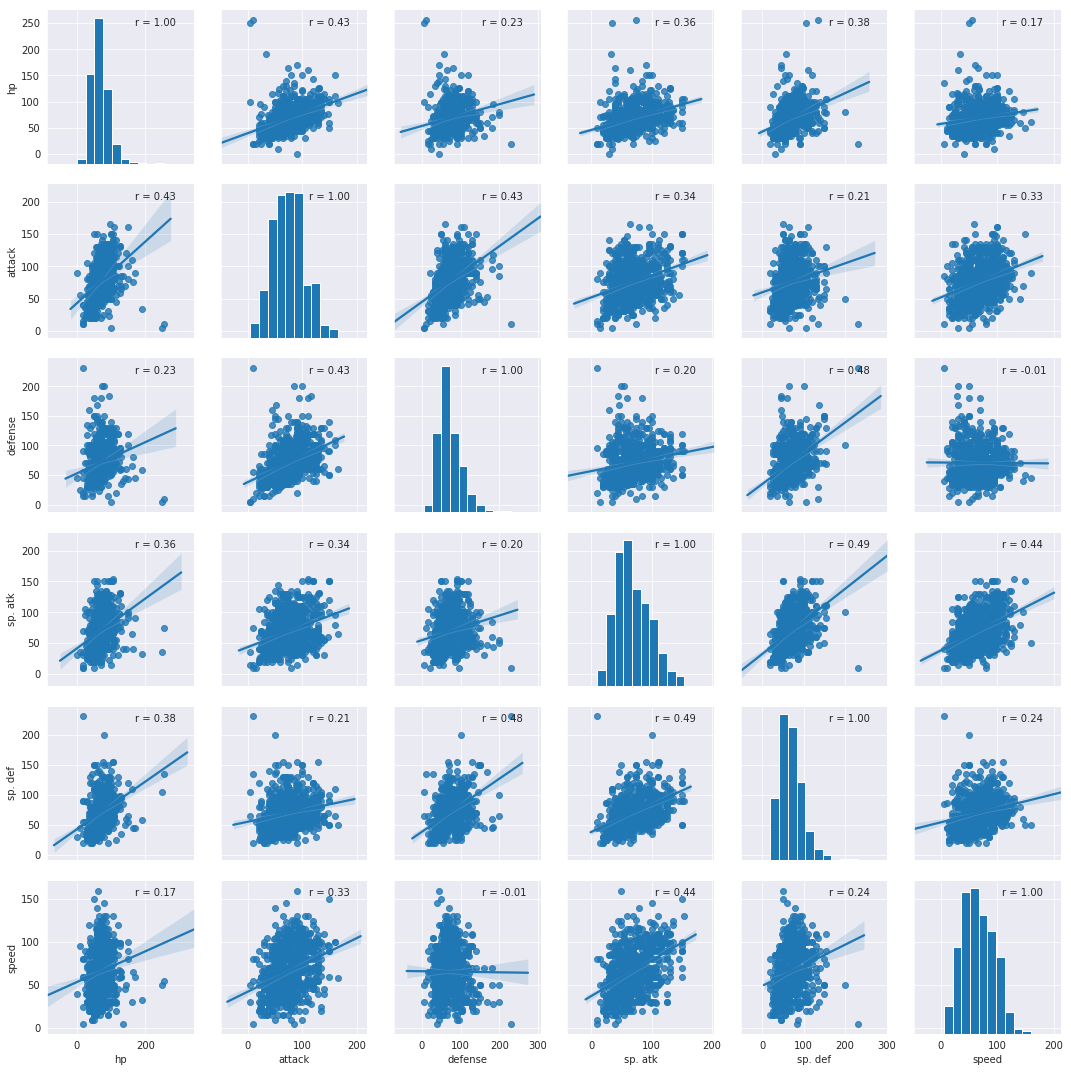

In [36]:
def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r), xy=(.6, .9), xycoords=ax.transAxes)


pplot=sb.pairplot(pairplt, kind='reg', markers='o', palette='PuBu')
pplot.map(corrfunc)
plt.show()

### Observations :
- From the plots, we can see that sp. atk and sp. def have the higest correlation.
- Sp. def and def also have a very high correlation - which means that most pokemon who are defensive are immune to sp. atks or have a unique way of defending themselves.
- Speed and defense have a negative correlation, suggesting that pokemon that have high defense have low speed - probably as they might be huge or bulky.
- Speed-attack and Attack-sp attack are somewhat correlated - this is probably due the nature of attacks that we have seen previously such as slash / water-gun, etc.
- The other combinations are somehwhat correlated - but not as much as the ones mentioned above - which probably means that there are unique pokemon that may have high combination of two or more statistics.

### What are the strongest and weakest Pokemon species?

- Total is just the sum of all the statistics. There are various categories of pokemon and each has their own unique combination of stats - some may have very high HP or attack, while all the other stats might be low.
- In some cases, some of the stats may not matter as much (such as sp. def or sp. atk) - and these values may have less weightage on the overall strength of the pokemon. 
- A good idea would be to compare the same stats of diffenet pokemon (HP of  one pokemon vs Hp of another) rather than the sum of all stats. 

In [37]:
# Instead, we'll try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species. 

zscore=stats.zscore(pairplt)
z=pd.DataFrame(data=zscore, columns=['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed'])

In [38]:
# Defining a new column, strength, as the sum of the z-scores of each statistic—the higher this value, the stronger the Pokemon.
z['strength']=z['hp']+z['attack']+z['defense']+z['sp. atk']+z['sp. def']+z['speed']
z

,hp,attack,defense,sp. atk,sp. def,speed,strength
0,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849
1,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052
2,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508
3,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979
4,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334
5,0.372429,0.305512,0.250298,1.390346,0.588515,1.257776,4.164876
6,-0.943852,-0.933724,-0.195294,-0.652693,-0.192715,-0.833277,-3.751554
7,-0.363140,-0.417375,0.318850,-0.133276,0.402508,-0.283000,-0.475433
8,0.411143,0.271089,1.004376,0.559280,1.332543,0.450703,4.029134
9,-0.905138,-1.553341,-1.223583,-1.691527,-1.829577,-0.759906,-7.963072


In [39]:
z_new=z.copy()
z_new=z_new.assign(name=df.name.values, type1=df['type 1'].values, type2=df['type 2'].values)

In [40]:
z_new=z_new[['name', 'type1', 'type2', 'strength']]
#z_new=z_new[z_new['type2']!='None']

In [41]:
z_strength=z_new.groupby(['type1', 'type2']).mean()['strength'].unstack()
z_strength=z_strength.round(2)
z_strength

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,None,Normal,Poison,Psychic,Rock,Steel,Water
type1,,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,-0.80,NaN,2.98,1.35,-0.42,-6.72,-1.26,-5.57,NaN,-4.60,NaN,-2.99,NaN,0.53,3.15,-5.30
Dark,NaN,NaN,0.78,NaN,NaN,-0.02,-0.11,2.76,-1.43,NaN,NaN,1.92,0.11,NaN,NaN,-1.17,NaN,-0.21,NaN
Dragon,NaN,NaN,NaN,9.30,NaN,NaN,9.36,6.23,NaN,NaN,2.16,8.71,-0.19,NaN,NaN,6.57,NaN,NaN,NaN
Electric,NaN,NaN,NaN,NaN,0.52,NaN,NaN,3.98,0.76,NaN,NaN,NaN,-0.37,-1.14,NaN,NaN,NaN,0.73,NaN
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.07,NaN,NaN,NaN,NaN,-0.43,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,2.75,NaN,NaN,NaN,NaN,NaN,2.97,NaN,NaN,NaN,NaN,-0.82,NaN,NaN,-2.62,NaN,3.76,NaN
Fire,NaN,NaN,NaN,NaN,NaN,1.85,NaN,4.22,NaN,NaN,-1.32,NaN,-0.21,0.75,NaN,4.20,-0.41,6.50,6.39
Flying,NaN,NaN,-0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.77,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,2.27,9.57,NaN,NaN,NaN,-1.10,0.37,NaN,-0.57,NaN,NaN,-0.15,NaN,-0.51,NaN,NaN,NaN,NaN


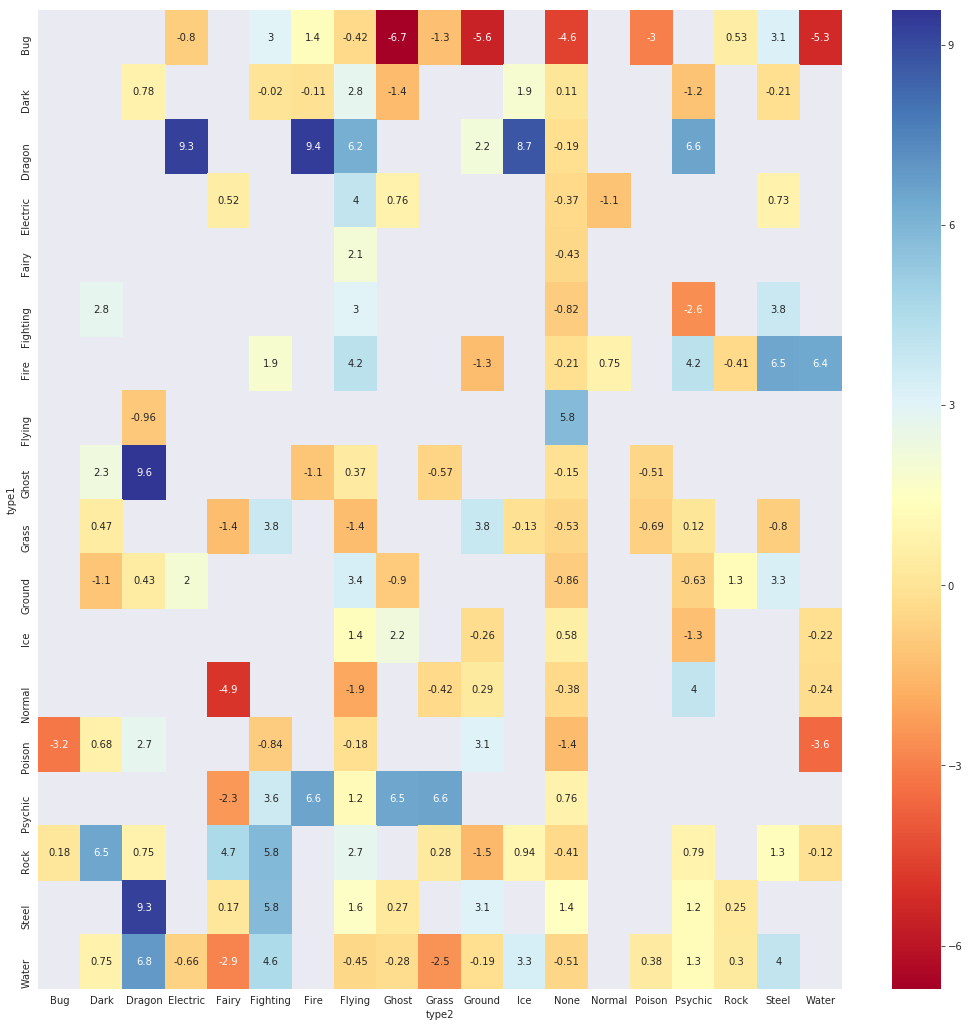

In [42]:
plt.subplots(figsize=(18,18))
sb.heatmap(z_strength, annot=True, cmap='RdYlBu')

- There is a clear trend that shows that pokemon that have 'Dragon' type 1 or type 2 are the strongest pokemon.
- Bug pokemon are among some of the weakest pokemon - this is probably true because most bugs are relatively small in size.
- Bug, Dark, Grass, Fairy and Ice types are relatively weak.
- Steel, Rock, Water, Fire and Psychih pokemon are relatively strong with some ccombinations having good strength values.
- Most pokemon that have only type1 and no type 2 values are also relatively weak, except for the Flying type.

### Do any types of Pokemon excel at certain statistics over others?

In [43]:
z_stats=z.copy()
z_stats=z_stats.assign(type1=df['type 1'].values, type2=df['type 2'].values)
#z_stats=z_stats[z_stats["type2"]!='None']
z_stats

,hp,attack,defense,sp. atk,sp. def,speed,strength,type1,type2
0,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849,Grass,Poison
1,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052,Grass,Poison
2,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508,Grass,Poison
3,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979,Fire,None
4,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334,Fire,None
5,0.372429,0.305512,0.250298,1.390346,0.588515,1.257776,4.164876,Fire,Flying
6,-0.943852,-0.933724,-0.195294,-0.652693,-0.192715,-0.833277,-3.751554,Water,None
7,-0.363140,-0.417375,0.318850,-0.133276,0.402508,-0.283000,-0.475433,Water,None
8,0.411143,0.271089,1.004376,0.559280,1.332543,0.450703,4.029134,Water,None
9,-0.905138,-1.553341,-1.223583,-1.691527,-1.829577,-0.759906,-7.963072,Bug,None


Text(0.5, 1.0, 'Heatmap of normalized Speed values')

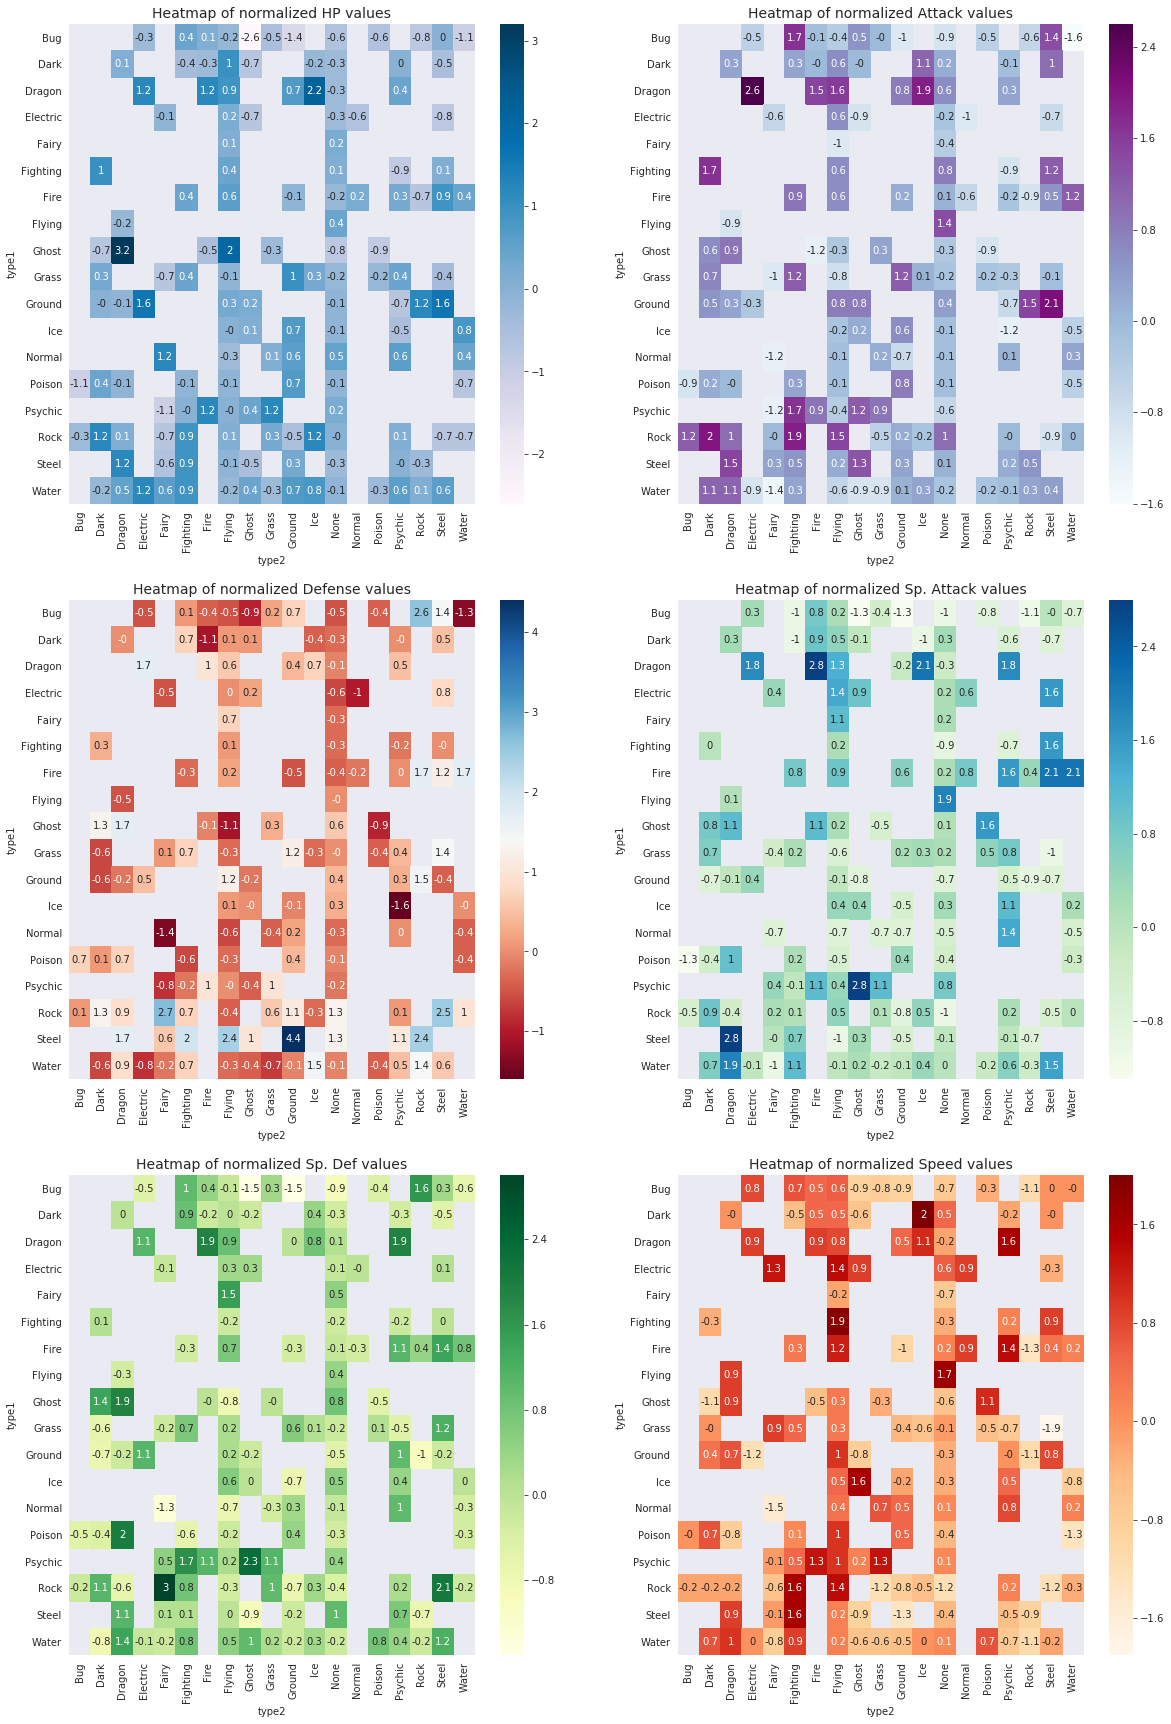

In [44]:
plt.subplots(figsize=(20,30))
ax1=plt.subplot(321)
z_hp=z_stats.groupby(['type1', 'type2']).mean()['hp'].unstack()
z_hp=z_hp.round(1)
sb.heatmap(z_hp, annot=True, cmap='PuBu')
ax1.set_title('Heatmap of normalized HP values', fontsize=14)

ax2=plt.subplot(322)
z_attack=z_stats.groupby(['type1', 'type2']).mean()['attack'].unstack()
z_attack=z_attack.round(1)
sb.heatmap(z_attack, annot=True, cmap='BuPu')
ax2.set_title('Heatmap of normalized Attack values', fontsize=14)

ax3=plt.subplot(323)
z_defense=z_stats.groupby(['type1', 'type2']).mean()['defense'].unstack()
z_defense=z_defense.round(1)
sb.heatmap(z_defense, annot=True, cmap='RdBu')
ax3.set_title('Heatmap of normalized Defense values', fontsize=14)

ax4=plt.subplot(324)
z_spatk=z_stats.groupby(['type1', 'type2']).mean()['sp. atk'].unstack()
z_spatk=z_spatk.round(1)
sb.heatmap(z_spatk, annot=True, cmap='GnBu')
ax4.set_title('Heatmap of normalized Sp. Attack values', fontsize=14)

ax5=plt.subplot(325)
z_spdef=z_stats.groupby(['type1', 'type2']).mean()['sp. def'].unstack()
z_spdef=z_spdef.round(1)
sb.heatmap(z_spdef, annot=True, cmap='YlGn')
ax5.set_title('Heatmap of normalized Sp. Def values', fontsize=14)

ax6=plt.subplot(326)
z_speed=z_stats.groupby(['type1', 'type2']).mean()['speed'].unstack()
z_speed=z_speed.round(1)
sb.heatmap(z_speed, annot=True, cmap='OrRd')
ax6.set_title('Heatmap of normalized Speed values', fontsize=14)

### Observations

- HP:       Dragon-Ghost pokemon - highest, Ghost-Bug - lowest
- Attack:   Dragon-Electric - highest, lowest - water-fairy
- Defense:  Steel-ground - highest, Ice-Psychic - lowest
- Sp. Atk:  Steel- Dragon, Dragon-fire, Psychic ghost - highest, Bug-ghost & Bug-ground - lowest
- Sp.Def:   Rock-Fairy - highest, Bug-ghost & Bug-ground - lowest
- Speed:    Dark-Ice - highest, Grass-steel - lowest



### Are any of the statistics correlated?

In [45]:
zcorr=z_stats[['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed', 'strength']]
zcorrmatrix=zcorr.corr()
zcorrmatrix

,hp,attack,defense,sp. atk,sp. def,speed,strength
hp,1.000000,0.425839,0.234177,0.362636,0.382569,0.170031,0.654796
attack,0.425839,1.000000,0.434022,0.339699,0.208322,0.332172,0.696699
defense,0.234177,0.434022,1.000000,0.202188,0.479991,-0.006849,0.595877
sp. atk,0.362636,0.339699,0.202188,1.000000,0.493038,0.439548,0.721377
sp. def,0.382569,0.208322,0.479991,0.493038,1.000000,0.236499,0.712048
speed,0.170031,0.332172,-0.006849,0.439548,0.236499,1.000000,0.552111
strength,0.654796,0.696699,0.595877,0.721377,0.712048,0.552111,1.000000


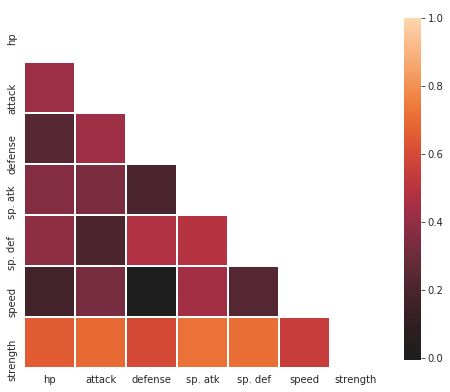

In [46]:
sb.set_style('white')
mask = np.zeros_like(zcorrmatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(220, 50, as_cmap=True)

plt.subplots(figsize=(8, 7))
sb.heatmap(zcorrmatrix, mask=mask, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .9})

### Observation:


- Attack and Hp and Attack and defense are somewhat correlated- probably beacuse if a pokemon is bigger, it also has greater attack as well as defense.
- Speed and defense are negatively correlated - it makes sense because if a pokemon is huge / bulky wuth high defense, it may not be swift.
- Attack and sp. atk are also somewhat correalted.
- Strength is correlated to most values since it is the normalized value of all stats.